# Venta de celulares
*Link a datos: https://www.kaggle.com/iabhishekofficial/mobile-price-classification*
## Importamos las librerias 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

## Cargando archivos 

In [2]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

## EDA

In [7]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

***No encontramos valores nulos***

In [6]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
train.shape

(2000, 21)

In [8]:
train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [9]:
train.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [10]:
train.price_range.unique()

array([1, 2, 3, 0], dtype=int64)

### Buscando relacion entre variables 

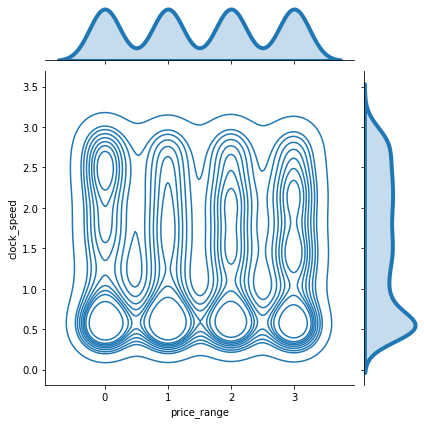

In [11]:
Velo_price = sns.jointplot(x='price_range', y='clock_speed',data=train, 
                           kind='kde', 
                           marginal_kws={'lw':4, 'shade':True}
                          
                          );

In [12]:
train['clock_speed'].corr(train['price_range'])

-0.006605690881732071

*Podemos observar que esta variable de velocidad del procesador de un celular no afecta en su precio.*

<AxesSubplot:xlabel='price_range', ylabel='fc'>

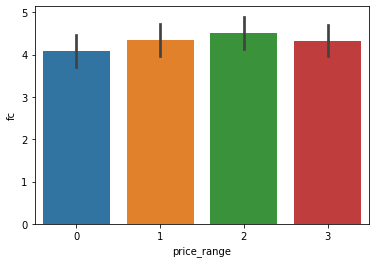

In [13]:
sns.barplot(x='price_range',y='fc', data=train)

In [14]:
train['fc'].corr(train['price_range'])

0.02199820777690427

*Podemos notar que si hay diferencias y que tiene relacion con el rango de precio de esta variable `fc` pero no inflluye demasiado*

#### Buscando relacion entre variables categoricas

In [15]:
categoricos = train[['blue','four_g','touch_screen', 'wifi', 'price_range']]

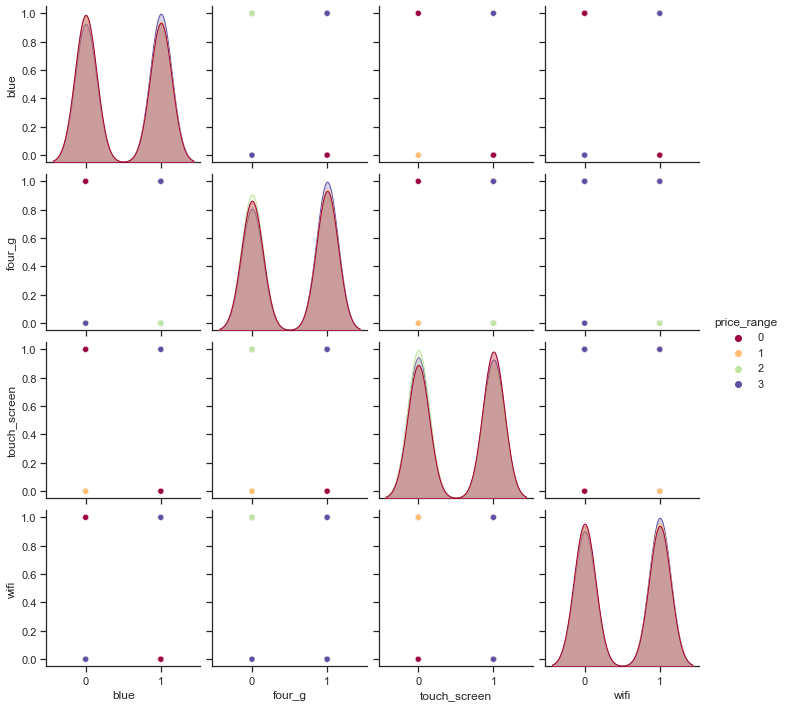

In [16]:
sns.set(style='ticks',color_codes=True)
g=sns.pairplot(categoricos,hue='price_range',palette='Spectral')

*Podemos observar que las variables categoricas no afectan en el precio*

## Realizamos la correlacion que tienen entre ambas

In [17]:
train.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


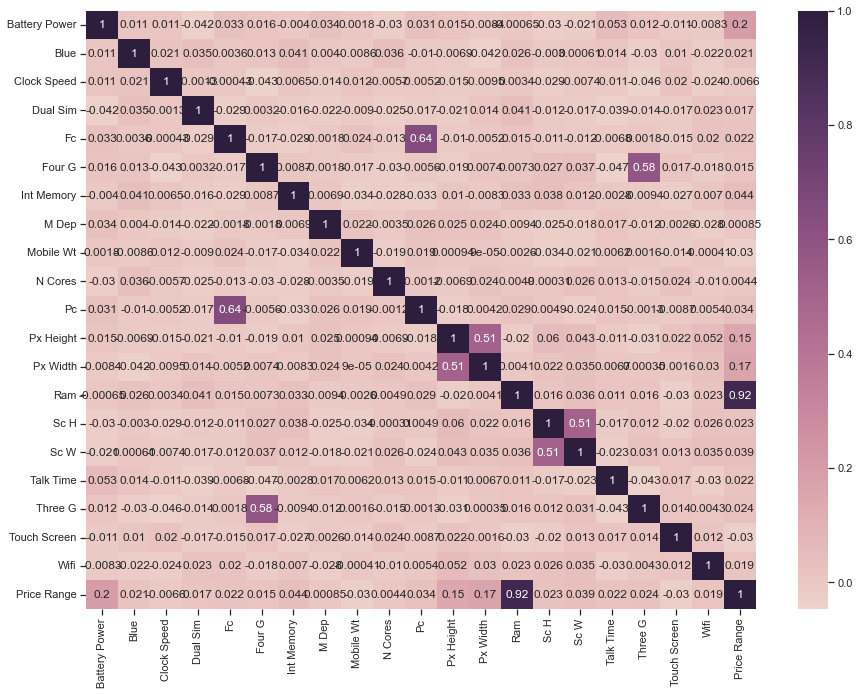

In [18]:
h_labels = [
    x.replace("_", " ").title()
    for x in list(train.select_dtypes(include=["number", "bool"]).columns.values)
]

fig, ax = plt.subplots(figsize=(15, 11))
_ = sns.heatmap(
    train.corr(),
    annot=True,
    xticklabels=h_labels,
    yticklabels=h_labels,
    cmap=sns.cubehelix_palette(as_cmap=True),
    ax=ax,
)

Las unicas variables que si tienen efecto en el rango de precio son la ***bateria,ancho, largo y la ram de un telefono***

In [19]:
valores_affectt1 = train[['battery_power','px_height',
       'px_width', 'ram','price_range']]

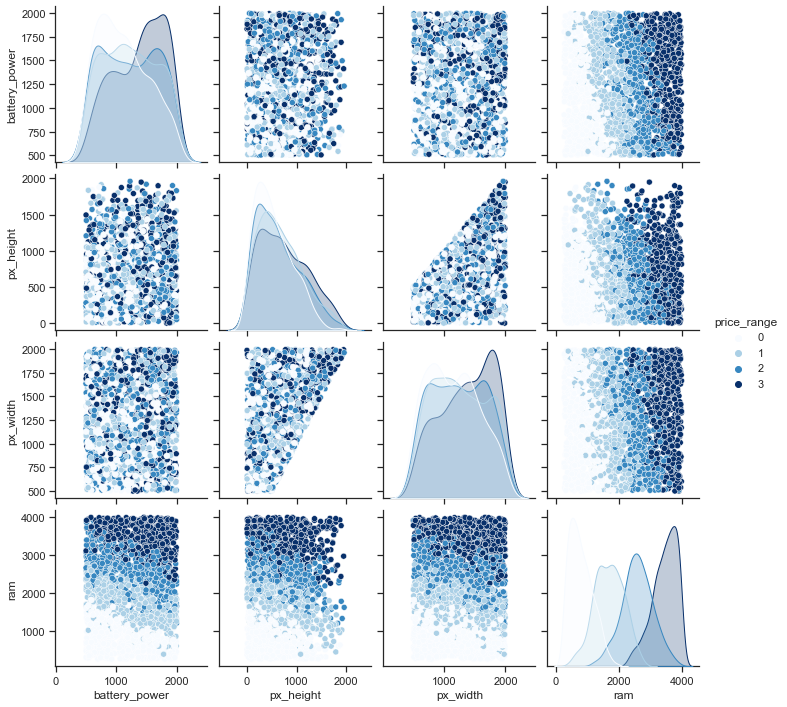

In [20]:
sns.pairplot(valores_affectt1, hue='price_range',palette='Blues')

***Podemos ver que la ram es el que mas afecta en el rango de precio***

<AxesSubplot:xlabel='price_range', ylabel='ram'>

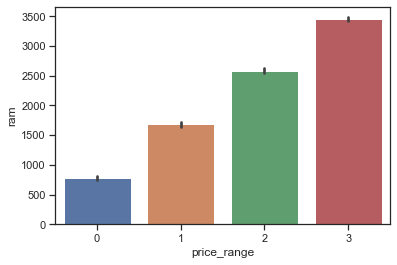

In [21]:
sns.barplot(x='price_range',y='ram',data=train)

In [52]:
profile = ProfileReport(train,title='Reporte Venta DE Celulares', explorative=True)
profile.to_file('Reporte.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

*Verificando el reporte, que no esta demas ya que se me pudo a ver pasado algo note que en el recuento de los valores habian valores 0, entonces recurro a borrarlos ya que nos va a afectar*

## Limpiando datos 

In [3]:
train_new = train[train.sc_w != 0]
train_new.shape

(1820, 21)

*Observamos que esta equilibrada nuesta variable objeto*

In [5]:
train_new['price_range'].value_counts().plot(kind='barh', legend='Reverse')

<AxesSubplot:>

In [6]:
ax = sns.boxplot(data=train_new, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

[Text(0, 0, 'battery_power'),
 Text(1, 0, 'blue'),
 Text(2, 0, 'clock_speed'),
 Text(3, 0, 'dual_sim'),
 Text(4, 0, 'fc'),
 Text(5, 0, 'four_g'),
 Text(6, 0, 'int_memory'),
 Text(7, 0, 'm_dep'),
 Text(8, 0, 'mobile_wt'),
 Text(9, 0, 'n_cores'),
 Text(10, 0, 'pc'),
 Text(11, 0, 'px_height'),
 Text(12, 0, 'px_width'),
 Text(13, 0, 'ram'),
 Text(14, 0, 'sc_h'),
 Text(15, 0, 'sc_w'),
 Text(16, 0, 'talk_time'),
 Text(17, 0, 'three_g'),
 Text(18, 0, 'touch_screen'),
 Text(19, 0, 'wifi'),
 Text(20, 0, 'price_range')]

## Modelado

*Dividimos el dataset*

In [4]:
features= train_new.drop(['price_range'], axis=1)
variable_objetivo = train_new['price_range']

In [5]:
features.shape

(1820, 20)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid= train_test_split(features, variable_objetivo, test_size=0.2, random_state=0)

***mutual_info_classif***-Nos va ayudar a ver las dependecias que existen con respecto al valor objetivo si es 0 son idependientes y en el caso contrario son dependientes.

In [7]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X_train, y_train, random_state=0)
mi

array([3.22523809e-02, 0.00000000e+00, 0.00000000e+00, 1.95040877e-02,
       0.00000000e+00, 7.98417228e-04, 3.50334976e-02, 0.00000000e+00,
       2.74888849e-02, 2.86202121e-02, 1.32783236e-02, 1.20678029e-04,
       2.90028523e-02, 8.33148967e-01, 0.00000000e+00, 3.28609198e-03,
       8.26935850e-03, 1.32228733e-02, 0.00000000e+00, 1.44758877e-03])

*Ahora filtramos los valores que sea mayores a 0 ya que buscamos las variables dependientes*

In [8]:
mi = pd.Series(mi)
mi.index = X_train.columns

mi.sort_values(ascending=False)

ram              0.833149
int_memory       0.035033
battery_power    0.032252
px_width         0.029003
n_cores          0.028620
mobile_wt        0.027489
dual_sim         0.019504
pc               0.013278
three_g          0.013223
talk_time        0.008269
sc_w             0.003286
wifi             0.001448
four_g           0.000798
px_height        0.000121
m_dep            0.000000
blue             0.000000
fc               0.000000
clock_speed      0.000000
sc_h             0.000000
touch_screen     0.000000
dtype: float64

*Las variables que buscamos esas seran nuestras features*

In [9]:
selected_features=[]
for index, value in mi.items():
    if value>0:
        selected_features.append(index)
selected_features

['battery_power',
 'dual_sim',
 'four_g',
 'int_memory',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_w',
 'talk_time',
 'three_g',
 'wifi']

In [10]:
X_opt_train= X_train[selected_features]
X_opt_valid= X_valid[selected_features]

X_opt_train.head()

,battery_power,dual_sim,four_g,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_w,talk_time,three_g,wifi
250,893,1,0,55,183,2,1,417,946,2986,1,6,0,1
965,1379,1,0,19,134,8,17,387,671,3912,2,19,0,1
588,1966,1,0,40,185,8,18,1197,1987,1185,2,20,0,0
1623,1862,0,0,62,182,1,2,386,1046,1017,3,9,1,0
1296,1644,0,1,44,137,8,0,358,791,2360,4,19,1,0


**Escalamos los datos para normalizarlos ya que tienen valores de diferente escala**

In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_opt_train=pd.DataFrame(sc.fit_transform(X_opt_train))
X_opt_valid=pd.DataFrame(sc.transform(X_opt_valid))

In [12]:
X_opt_train.columns=selected_features
X_opt_valid.columns=selected_features

X_opt_valid.head()

,battery_power,dual_sim,four_g,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_w,talk_time,three_g,wifi
0,-1.493608,-1.005510,0.956969,0.547852,-0.562683,1.088042,1.184149,0.322867,-0.300606,-0.254447,-1.054776,-0.723142,0.566775,0.959606
1,-0.125426,0.994521,0.956969,-1.271933,-0.761244,-1.096444,-1.635481,1.572823,0.713695,0.691754,1.146495,0.929754,0.566775,0.959606
2,-0.016335,-1.005510,0.956969,-0.003598,0.061369,-0.222649,1.350010,-0.338211,0.356384,-1.108515,1.391081,0.562444,0.566775,0.959606
3,-0.254972,0.994521,-1.044966,0.933867,-1.130002,0.214248,1.350010,0.036325,-0.853861,-0.285772,1.635667,0.929754,0.566775,-1.042094
4,-0.934517,0.994521,0.956969,-1.492512,0.685420,0.214248,-1.303760,-1.427974,1.603513,1.659145,-0.321019,0.562444,0.566775,0.959606


**Teniendo los futures y esos mismos ya escalados comenzamos con lo bueno, en este caso elegimos 
regresion lineal por que es mas facil, Comenzamos entrenando donde no tuvimos underfitting y en 
el momento de validad tuvimos un buen desempeño en el modelo**

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr =LogisticRegression(random_state=0)
lr.fit(X_opt_train,y_train)
train_pred = lr.predict(X_opt_train
print('Regresion Lineal con entrenamiento: ',accuracy_score(y_train,train_pred))
val_pred=lr.predict(X_opt_valid)
print('Regresion Lineal con validacion: ',accuracy_score(y_valid,val_pred))

Regresion Lineal con entrenamiento:  0.9752747252747253
Regresion Lineal con validacion:  0.967032967032967


*Regresamos la escala a sus valores normales para comparar las caracteristicas del equipo y concatenamos al data
frame sus prediciones*

In [14]:
val = sc.inverse_transform(X_opt_valid)
val = pd.DataFrame(val)
val.columns=selected_features

In [15]:
val_pred = pd.DataFrame(val_pred)
valid = pd.DataFrame(val)
val_pred = val_pred.rename({0: 'Prediccion'}, axis=1)

In [16]:
final_val_df=pd.concat([val_pred,valid ],axis=1)
final_val_df

,Prediccion,battery_power,dual_sim,four_g,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_w,talk_time,three_g,wifi
0,1,586.0,0.0,1.0,42.0,121.0,7.0,17.0,785.0,1118.0,1869.0,2.0,7.0,1.0,1.0
1,3,1188.0,1.0,1.0,9.0,114.0,2.0,0.0,1339.0,1558.0,2896.0,11.0,16.0,1.0,1.0
2,0,1236.0,0.0,1.0,32.0,143.0,4.0,18.0,492.0,1403.0,942.0,12.0,14.0,1.0,1.0
3,1,1131.0,1.0,0.0,49.0,101.0,5.0,18.0,658.0,878.0,1835.0,13.0,16.0,1.0,0.0
4,3,832.0,1.0,1.0,5.0,165.0,5.0,2.0,9.0,1944.0,3946.0,5.0,14.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,2,596.0,0.0,0.0,46.0,165.0,1.0,18.0,953.0,984.0,2505.0,4.0,15.0,1.0,0.0
360,1,1225.0,0.0,0.0,15.0,155.0,5.0,0.0,840.0,982.0,1970.0,8.0,15.0,1.0,0.0
361,1,1065.0,1.0,1.0,21.0,158.0,5.0,3.0,760.0,1722.0,1193.0,13.0,20.0,1.0,1.0
362,2,880.0,1.0,0.0,44.0,172.0,8.0,15.0,436.0,1302.0,3132.0,7.0,6.0,0.0,1.0


### Propio ejemplo

*Como ya sabemos cuales son las features vamos directo a dejarlas en el dataframe*

In [30]:
test_new = test[['battery_power','dual_sim','four_g',
 'int_memory',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_w',
 'talk_time',
 'three_g',
 'wifi']]

*Ponemos este vector ya que al escalar las columnas se cambian a numeros y con esto las podemos renombrar*

In [31]:
column = ['battery_power',
 'dual_sim',
 'four_g',
 'int_memory',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_w',
 'talk_time',
 'three_g',
 'wifi']

*Escalamos los valores de nuestro dataset y renombramos las columnas*

In [34]:
test1 = sc.fit_transform(test_new)
test1 = pd.DataFrame(test1)
test1.columns = column
convert = sc.inverse_transform(test1)
convert = pd.DataFrame(convert)
convert.columns=column

*Llamamos la funcion para predecir y por ultimo concatenamos los dos dataframes para ver los resultados*

In [49]:
ejemplo = lr.predict(test1)
ejemplo= pd.DataFrame(ejemplo)
ejemplo = ejemplo.rename({0: 'Prediccion'}, axis=1)

In [50]:
final_test_df=pd.concat([ejemplo,test_new],axis=1)
final_test_df

,Prediccion,battery_power,dual_sim,four_g,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_w,talk_time,three_g,wifi
0,3,1043,1,0,5,193,3,16,226,1412,3476,7,2,0,0
1,3,841,1,1,61,191,5,12,746,857,3895,0,7,1,0
2,2,1807,0,0,27,186,3,4,1270,1366,2396,10,10,0,1
3,3,1546,1,1,25,96,8,20,295,1752,3893,0,7,1,0
4,1,1434,0,1,49,108,6,18,749,810,1773,8,7,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,1700,0,1,54,170,7,17,644,913,2121,8,15,1,0
996,1,609,1,0,13,186,4,2,1152,1632,1933,1,19,0,1
997,0,1185,0,1,8,80,1,12,477,825,1223,0,14,1,0
998,2,1533,1,0,50,171,2,12,38,832,2509,11,6,0,0
